In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [215]:
df = pd.read_csv('/kaggle/input/datos-viviendas-tfm/DatosCompletos.csv')

/tmp/ipykernel_33/2361797972.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/datos-viviendas-tfm/DatosCompletos.csv')


In [216]:
# Verificar si hay datos faltantes
def check_missing_data(df):
    hay_nan = df.isnull().values.any()
    print(f"¿Hay algún NaN en el DataFrame? {hay_nan}")

    nan_por_columna = df.isnull().sum()
    print("Cantidad de NaN por columna:\n", nan_por_columna)

    filas_con_nan = df[df.isnull().any(axis=1)]
    print("Filas que contienen NaN:\n", filas_con_nan)

    return hay_nan, nan_por_columna, filas_con_nan

In [217]:
hay_nan, nan_por_columna, filas_con_nan = check_missing_data(df)

¿Hay algún NaN en el DataFrame? False
Cantidad de NaN por columna:
 Fecha                                        0
Caracteristicas                              0
Habitaciones                                 0
Aseos                                        0
Terraza                                      0
Piscina                                      0
Garaje                                       0
Precio                                       0
Metros                                       0
CodigoPostal                                 0
Latitud                                      0
Longitud                                     0
NMUN                                         0
Year                                         0
Mes                                          0
Media de la renta por unidad de consumo      0
Mediana de la renta por unidad de consumo    0
Renta bruta media por hogar                  0
Renta bruta media por persona                0
Renta neta media por hogar             

In [218]:
if hay_nan:
    df = df.dropna()

In [219]:
# hay_nan, nan_por_columna, filas_con_nan = check_missing_data(df)

In [220]:
print("Columnas del DataFrame:")
print(df.columns.values)

Columnas del DataFrame:
['Fecha' 'Caracteristicas' 'Habitaciones' 'Aseos' 'Terraza' 'Piscina'
 'Garaje' 'Precio' 'Metros' 'CodigoPostal' 'Latitud' 'Longitud' 'NMUN'
 'Year' 'Mes' 'Media de la renta por unidad de consumo'
 'Mediana de la renta por unidad de consumo' 'Renta bruta media por hogar'
 'Renta bruta media por persona' 'Renta neta media por hogar'
 'Renta neta media por persona ' 'total Paro Registrado'
 'Paro hombre edad < 25' 'Paro hombre edad 25 -45 '
 'Paro hombre edad >=45' 'Paro mujer edad < 25' 'Paro mujer edad 25 -45 '
 'Paro mujer edad >=45' 'Paro Agricultura' 'Paro Industria'
 'Paro construccion' 'Paro Servicios' 'Paro Sin empleo Anterior']


In [221]:
df['CodigoPostal'] = pd.to_numeric(df['CodigoPostal'], errors='coerce')

In [222]:
label = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label.fit_transform(df[col])

In [223]:
precios_iguales_a_cero = df[df['Precio'] < 1000]
print(precios_iguales_a_cero)

Empty DataFrame
Columns: [Fecha, Caracteristicas, Habitaciones, Aseos, Terraza, Piscina, Garaje, Precio, Metros, CodigoPostal, Latitud, Longitud, NMUN, Year, Mes, Media de la renta por unidad de consumo, Mediana de la renta por unidad de consumo, Renta bruta media por hogar, Renta bruta media por persona, Renta neta media por hogar, Renta neta media por persona , total Paro Registrado, Paro hombre edad < 25, Paro hombre edad 25 -45 , Paro hombre edad >=45, Paro mujer edad < 25, Paro mujer edad 25 -45 , Paro mujer edad >=45, Paro Agricultura, Paro Industria, Paro construccion, Paro Servicios, Paro Sin empleo Anterior]
Index: []

[0 rows x 33 columns]


<Axes: title={'center': 'Matriz de Correlación de Pearson'}>

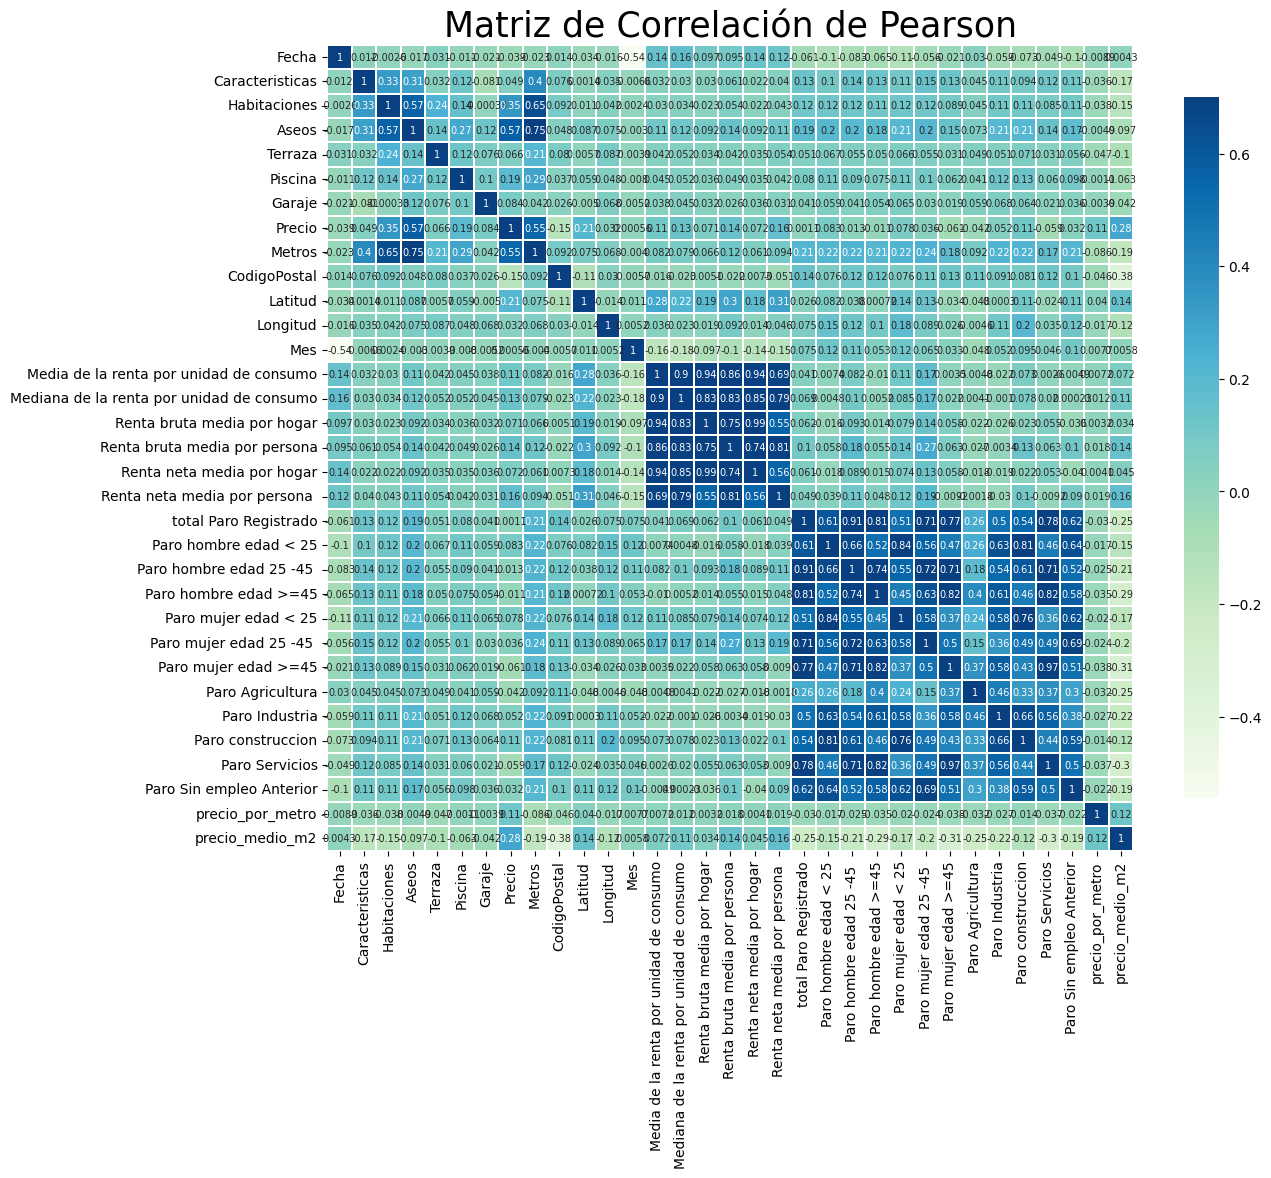

In [224]:
df['precio_por_metro'] = df['Precio'] / df['Metros']

# Calcular el precio medio por municipio
precio_medio_por_municipio = df.groupby('NMUN')['precio_por_metro'].mean().reset_index(name='precio_medio_m2')
df = df.merge(precio_medio_por_municipio, on='NMUN', how='left')
df = df.drop(['Year', 'NMUN'], axis=1)
plt.figure(figsize=(13,13))
plt.title('Matriz de Correlación de Pearson', fontsize=25)
sns.heatmap(df.corr(), linewidths=0.25, vmax=0.7, square=True, cmap="GnBu", linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})


<Axes: title={'center': 'Matriz de Correlación de Pearson'}>

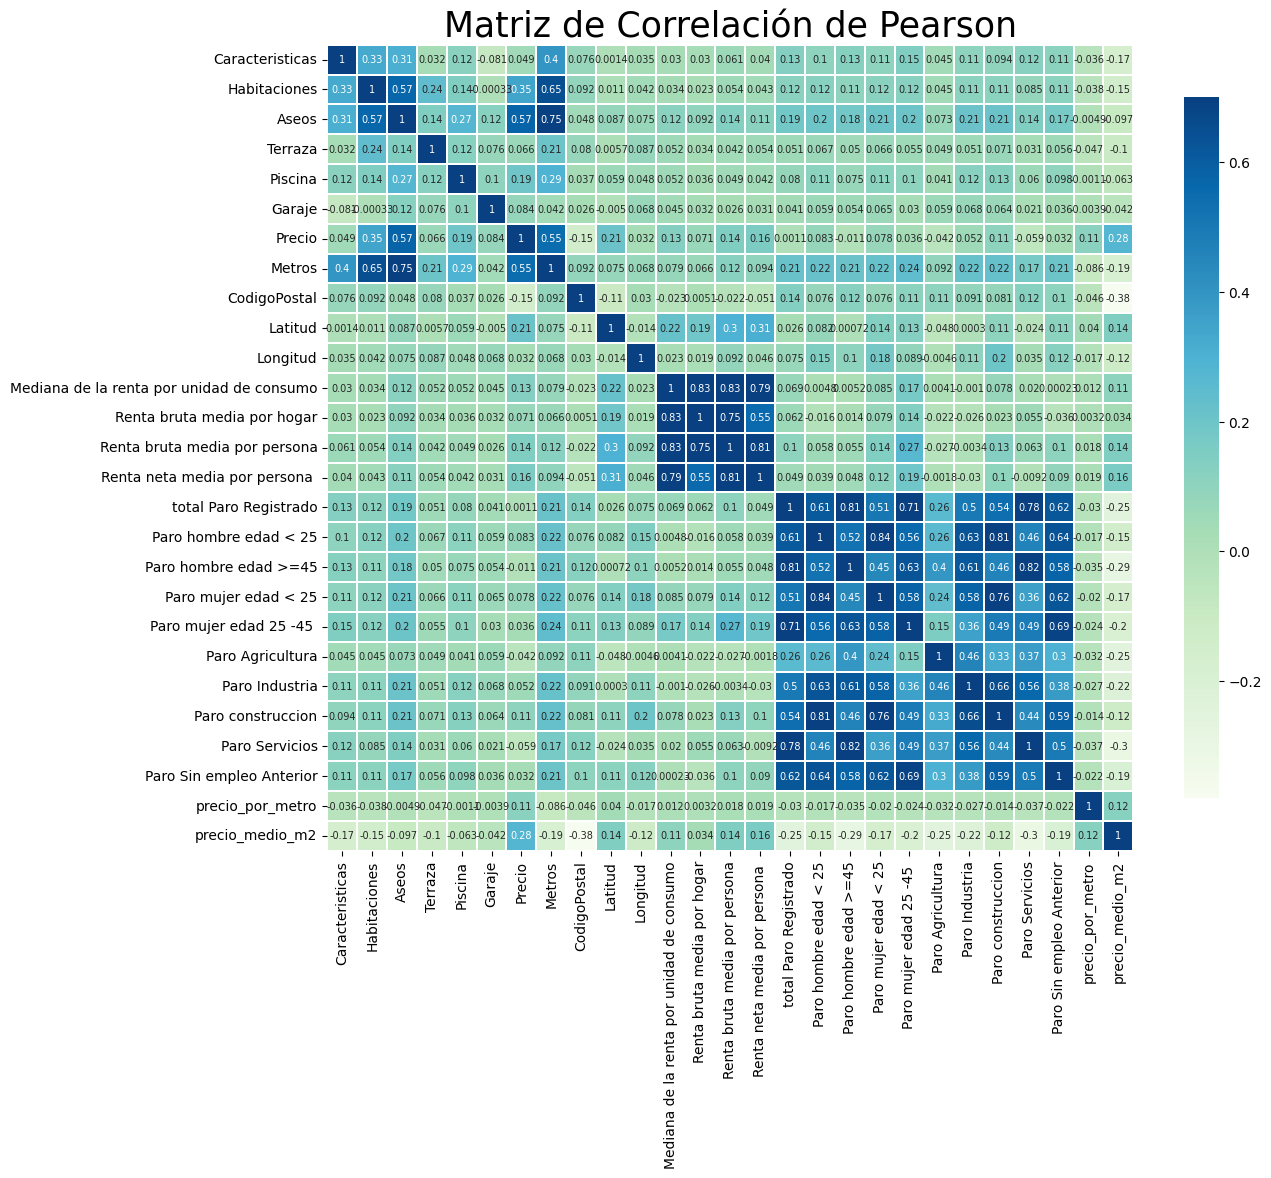

In [225]:
df = df.drop([
    'Paro hombre edad 25 -45 ',
    'Paro mujer edad >=45',
    'Media de la renta por unidad de consumo',
    'Renta neta media por hogar',
    'Fecha',
    'Mes',
], axis=1)
df.to_csv('viviendas.csv', index=False)
plt.figure(figsize=(13,13))
plt.title('Matriz de Correlación de Pearson', fontsize=25)
sns.heatmap(df.corr(), linewidths=0.25, vmax=0.7, square=True, cmap="GnBu", linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})

In [226]:
# Correlación con la columna 'Precio'
price_corr = df.corr()['Precio'].sort_values(ascending=False)
print("Correlación con 'Precio':\n", price_corr)

Correlación con 'Precio':
 Precio                                       1.000000
Aseos                                        0.574974
Metros                                       0.551349
Habitaciones                                 0.349441
precio_medio_m2                              0.277727
Latitud                                      0.206615
Piscina                                      0.194318
Renta neta media por persona                 0.159212
Renta bruta media por persona                0.143399
Mediana de la renta por unidad de consumo    0.131928
precio_por_metro                             0.114229
Paro construccion                            0.107252
Garaje                                       0.084108
Paro hombre edad < 25                        0.083225
Paro mujer edad < 25                         0.077557
Renta bruta media por hogar                  0.070572
Terraza                                      0.065994
Paro Industria                               0.051617
C

In [227]:
precc = df[(df['Precio'] > 200000) & (df['Precio'] < 210000)]
precc


precc = df[(df['Precio'] == 204125.0)]
precc

,Caracteristicas,Habitaciones,Aseos,Terraza,Piscina,Garaje,Precio,Metros,CodigoPostal,Latitud,...,Paro hombre edad >=45,Paro mujer edad < 25,Paro mujer edad 25 -45,Paro Agricultura,Paro Industria,Paro construccion,Paro Servicios,Paro Sin empleo Anterior,precio_por_metro,precio_medio_m2
26636,1,2.0,2.0,1,0,1,204125.0,82.0,28342.0,1475,...,27.0,5.0,35.0,6.0,13.0,14.0,89.0,9.0,2489.329268,2349.064438
26760,1,2.0,2.0,0,0,0,204125.0,81.0,28342.0,1381,...,27.0,5.0,35.0,6.0,13.0,14.0,89.0,9.0,2520.061728,2349.064438
26870,1,2.0,2.0,0,0,0,204125.0,82.0,28342.0,1378,...,27.0,5.0,35.0,6.0,13.0,14.0,89.0,9.0,2489.329268,2349.064438
28703,1,2.0,2.0,0,0,0,204125.0,82.0,28342.0,1475,...,27.0,5.0,35.0,6.0,13.0,14.0,89.0,9.0,2489.329268,2349.064438
28704,1,2.0,2.0,0,0,0,204125.0,82.0,28342.0,1475,...,27.0,5.0,35.0,6.0,13.0,14.0,89.0,9.0,2489.329268,2349.064438
28705,1,2.0,2.0,1,0,1,204125.0,82.0,28342.0,1475,...,27.0,5.0,35.0,6.0,13.0,14.0,89.0,9.0,2489.329268,2349.064438
28751,1,2.0,2.0,0,0,0,204125.0,81.0,28342.0,1408,...,27.0,5.0,35.0,6.0,13.0,14.0,89.0,9.0,2520.061728,2349.064438
28752,1,2.0,2.0,0,0,0,204125.0,81.0,28342.0,1374,...,27.0,5.0,35.0,6.0,13.0,14.0,89.0,9.0,2520.061728,2349.064438
28753,1,2.0,2.0,0,0,0,204125.0,81.0,28342.0,1398,...,27.0,5.0,35.0,6.0,13.0,14.0,89.0,9.0,2520.061728,2349.064438
28754,1,2.0,2.0,0,0,0,204125.0,81.0,28342.0,1403,...,27.0,5.0,35.0,6.0,13.0,14.0,89.0,9.0,2520.061728,2349.064438


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Precio en euros')

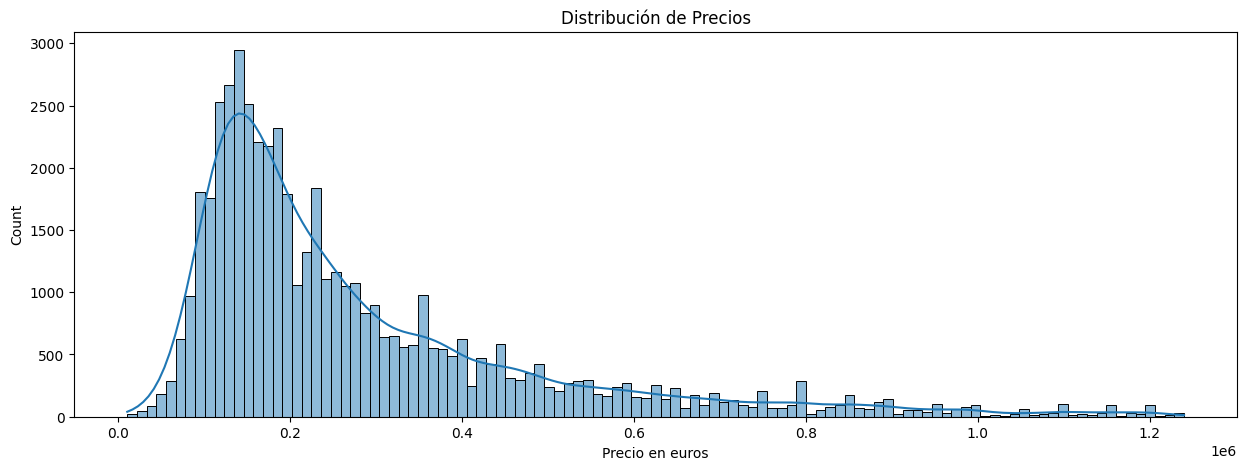

In [228]:
# Visualizaciones
plt.figure(figsize=(15,5))
sns.histplot(df['Precio'], kde=True)
plt.title('Distribución de Precios')
plt.xlabel('Precio en euros')

In [235]:
from scipy.stats import kurtosis
media_precio = df['Precio'].mean()
print(f"Media de Precio: {media_precio}")

# Calcular la mediana
mediana_precio = df['Precio'].median()
print(f"Mediana de Precio: {mediana_precio}")

# Calcular la curtosis
curtosis_precio = kurtosis(df['Precio'])
print(f"Curtosis de Precio: {curtosis_precio}")

Media de Precio: 283048.02658003545
Mediana de Precio: 208000.0
Curtosis de Precio: 3.4798098345186075


In [237]:
df = pd.DataFrame(df)

# Calcular la media
mean = df.mean()

# Calcular la desviación estándar
std = df.std()

# Calcular el valor mínimo
min_val = df.min()

# Calcular los percentiles
percentiles = df.quantile([0.25, 0.5, 0.75])

# Calcular el valor máximo
max_val = df.max()

# Calcular la curtosis
kurtosis_val = df.apply(kurtosis)

# Crear un DataFrame resumen
summary = pd.DataFrame({
    'Media': mean,
    'Std': std,
    'Min': min_val,
    '25%': percentiles.loc[0.25],
    '50%': percentiles.loc[0.5],
    '75%': percentiles.loc[0.75],
    'Max': max_val,
    'Kurtosis': kurtosis_val
})

print(summary)

                                                   Media            Std  \
Caracteristicas                                 5.233747       1.706824   
Habitaciones                                    2.787419       1.014570   
Aseos                                           1.665505       0.831395   
Terraza                                         0.409155       0.491683   
Piscina                                         0.112286       0.315721   
Garaje                                          0.108053       0.310450   
Precio                                     283048.026580  211835.723866   
Metros                                        108.806537      63.953846   
CodigoPostal                                28341.207033     691.781058   
Latitud                                     12470.689329    6448.494157   
Longitud                                    21591.819827   12080.970011   
Mediana de la renta por unidad de consumo      18.718257       1.289633   
Renta bruta media por hog

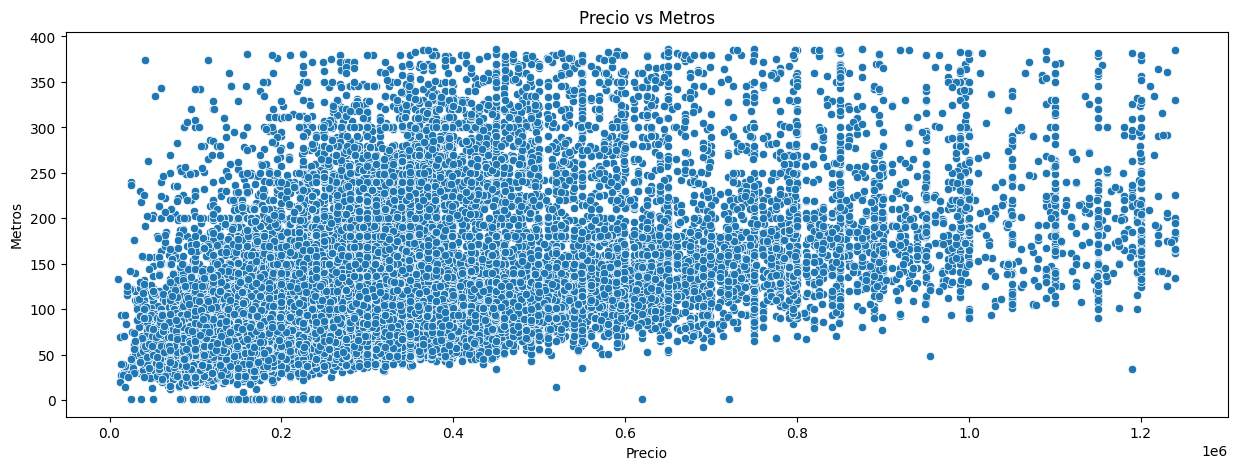

In [229]:
plt.figure(figsize=(15,5))

sns.scatterplot(x='Precio', y='Metros', data=df)
plt.title('Precio vs Metros')
plt.xlabel('Precio')
plt.ylabel('Metros')
plt.show()

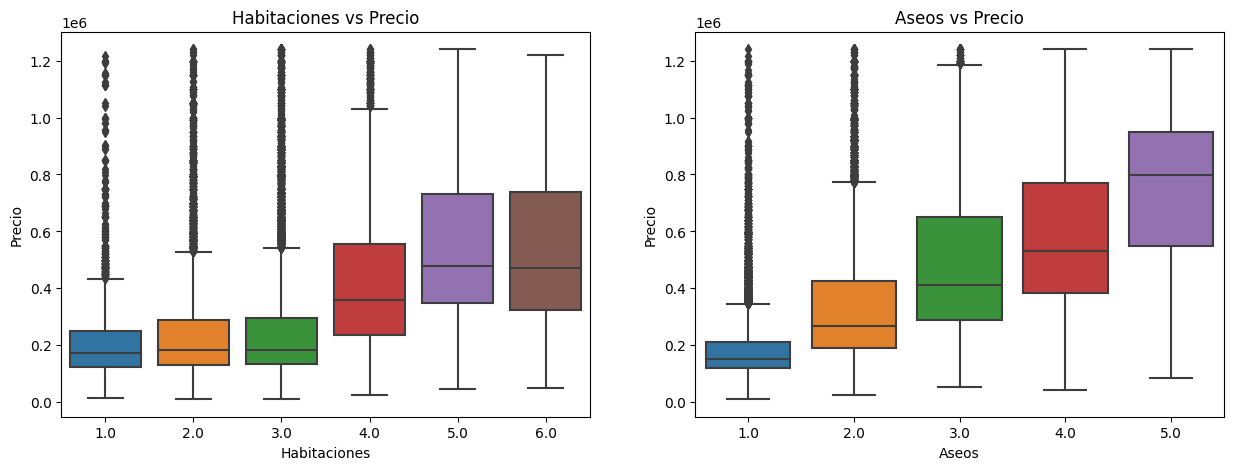

In [230]:
# Boxplots
f, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(x='Habitaciones', y='Precio', data=df, ax=axes[0])
sns.boxplot(x='Aseos', y='Precio', data=df, ax=axes[1])
axes[0].set_title('Habitaciones vs Precio')
axes[1].set_title('Aseos vs Precio')
plt.show()

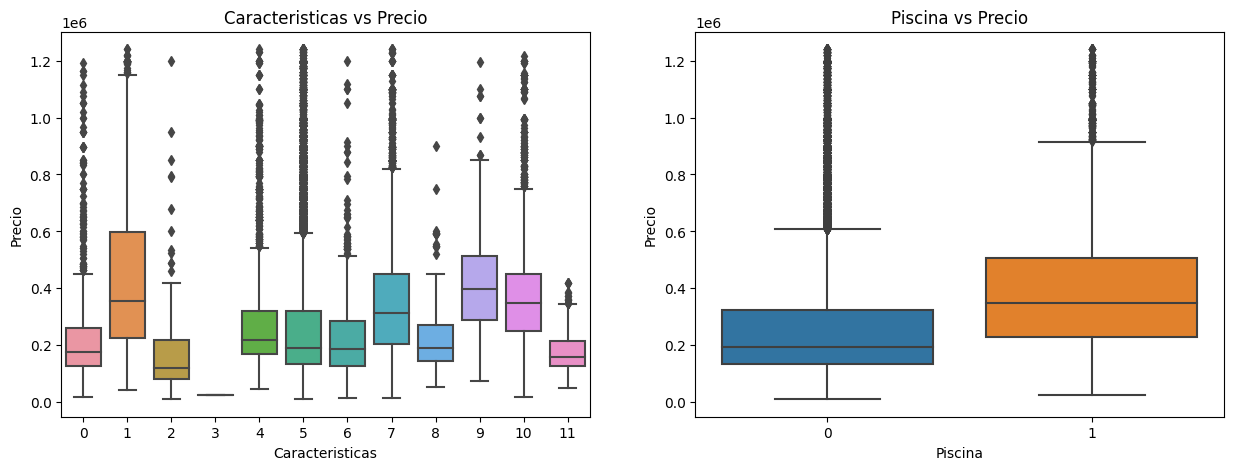

In [231]:
f, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(x='Caracteristicas', y='Precio', data=df, ax=axes[0])
sns.boxplot(x='Piscina', y='Precio', data=df, ax=axes[1])
axes[0].set_title('Caracteristicas vs Precio')
axes[1].set_title('Piscina vs Precio')
plt.show()

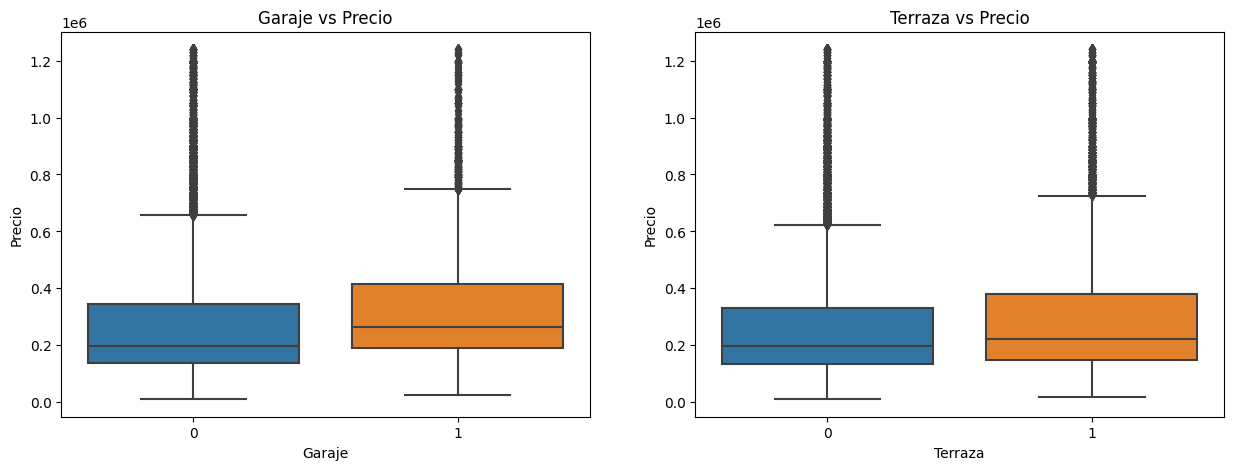

In [232]:

f, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(x='Garaje', y='Precio', data=df, ax=axes[0])
sns.boxplot(x='Terraza', y='Precio', data=df, ax=axes[1])
axes[0].set_title('Garaje vs Precio')
axes[1].set_title('Terraza vs Precio')
plt.show()